# Исследование и сравнение алгоритмов кластеризации на решении задачи уменьшения цветовой палитры
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> будем уменьшать количество цветов с помощью алгоритмов кластеризации.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуем различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering



In [ ]:
import matplotlib.pyplot as plt
import cv2

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image)
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

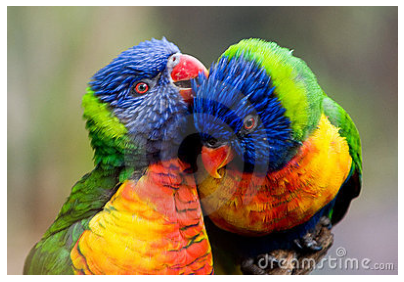

In [ ]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
print(img.shape)

(275, 400, 3)


In [ ]:
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# KMeans

In [ ]:
my_img = img.reshape(275 * 400, 3)

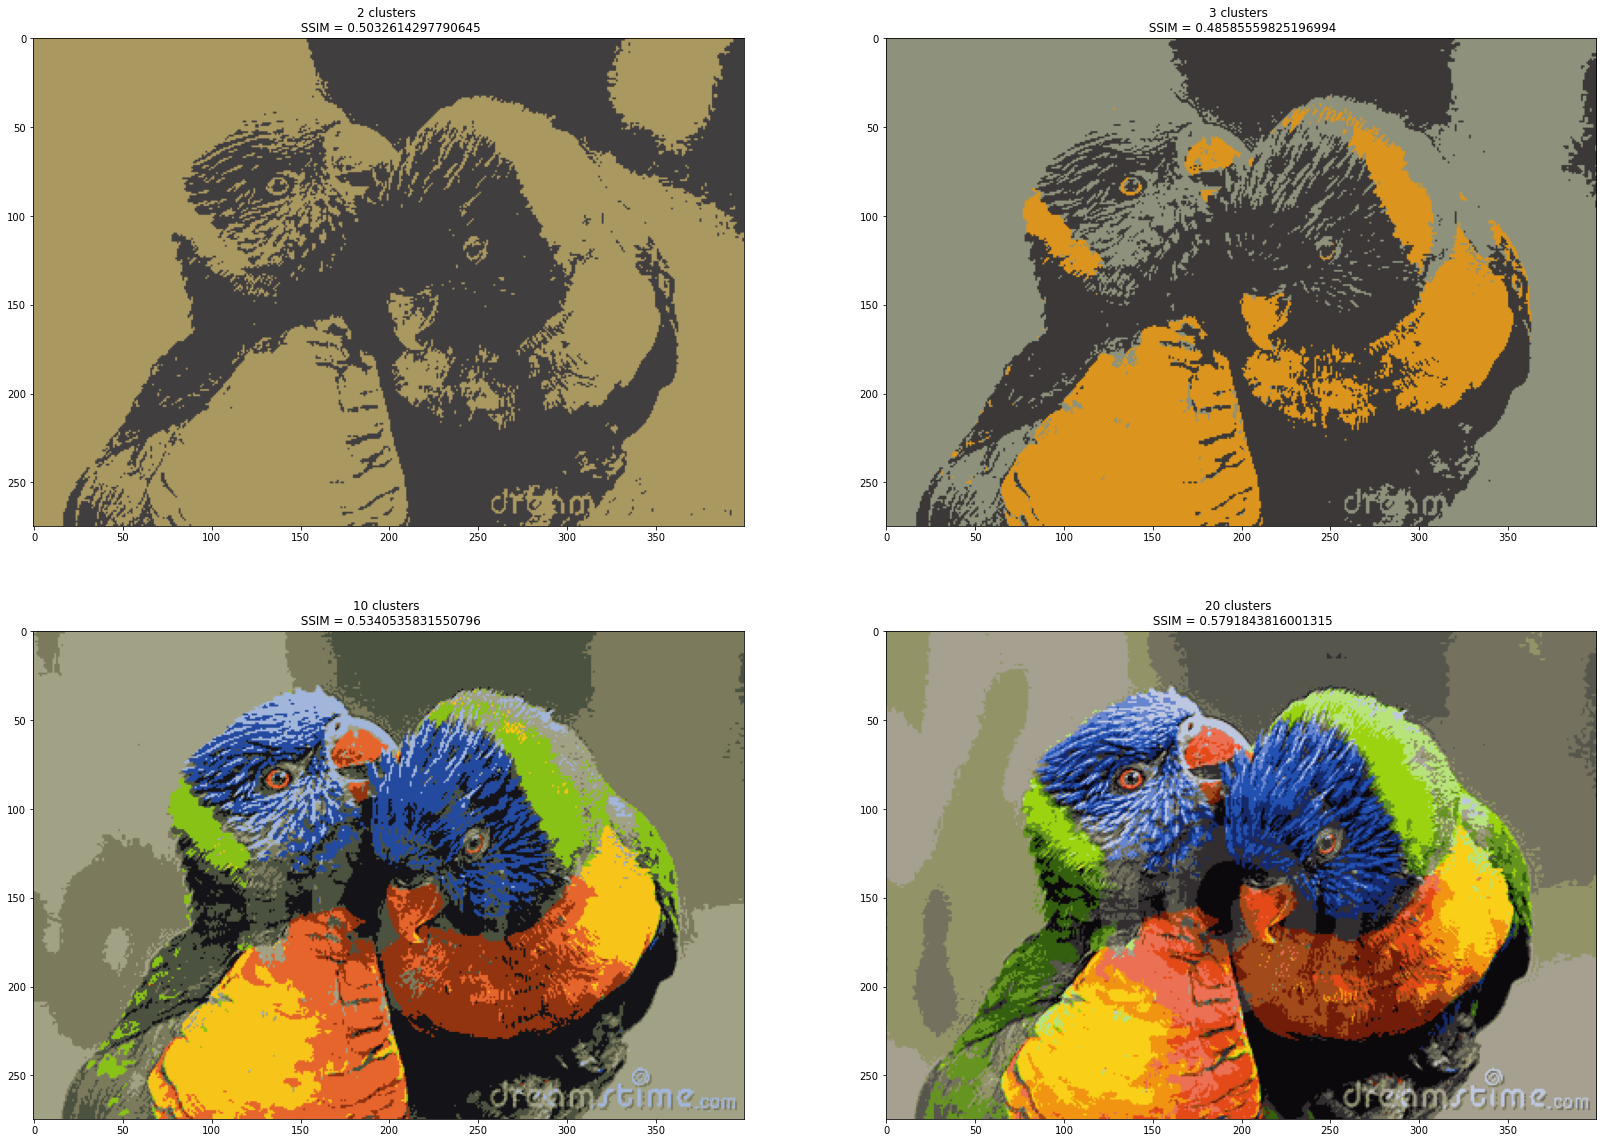

In [ ]:
my_img = img.reshape(275 * 400, 3)
kmean_ssim = []
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(28, 20))
for i, n in enumerate((2, 3, 10, 20)):
    model = KMeans(n_clusters=n)
    new_img = model.fit_predict(my_img)
    final_img = np.array(list(map(lambda x: model.cluster_centers_[x].astype(int)[::-1],
                              new_img))).reshape(275, 400, 3)

    ssm = ssim(img, final_img, multichannel=True)
    ax[i // 2][i % 2].imshow(final_img)
    ax[i // 2][i % 2].set_title(f'{n} clusters \n SSIM = {ssm}')
    kmean_ssim.append(ssm)


# DBSCAN

In [ ]:
my_img = img.reshape(275 * 400, 3)
ssims = []
for s in range(2, 10, 1):# перебираем параметры
    for e in np.arange(2.0, 5, 0.2):
        model = DBSCAN(min_samples=s, eps=e)
        new_img = model.fit_predict(my_img)
        dct = {}
        for j, i in enumerate(new_img):
            if i not in dct.keys():
                dct[i] = []
                color = np.array(my_img[j])[::-1]
                dct[i].append(color)
            else:
                color = np.array(my_img[j])[::-1]
                dct[i].append(color)

        for d in dct:
            dct[d] = np.median(np.array(dct[d]), axis=0)
        final_img = np.zeros(my_img.shape)
        for i in range(final_img.shape[0]):
            final_img[i] = np.array(dct[new_img[i]])
        final_img = final_img.reshape(img.shape).astype(int)
        m = ssim(img, final_img, multichannel=True)
        ssims.append((s, e, m))
print(max(ssims, key = lambda x: x[2]))

(2, 2.4000000000000004, 0.4823585868726495)


0.4823585868726495


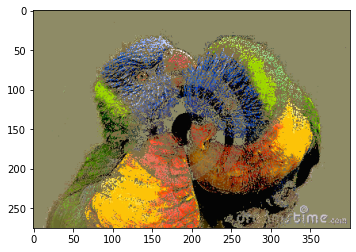

In [ ]:
my_img = img.reshape(275 * 400, 3)
dbscan_ssim = []
model = DBSCAN(min_samples=2, eps=2.4)
new_img = model.fit_predict(my_img)
dct = {}
for j, i in enumerate(new_img):
    if i not in dct.keys():
        dct[i] = []
        color = np.array(my_img[j])[::-1]
        dct[i].append(color)
    else:
        color = np.array(my_img[j])[::-1]
        dct[i].append(color)
for d in dct:
    dct[d] = np.median(np.array(dct[d]), axis=0)
    final_img = np.zeros(my_img.shape)
for i in range(final_img.shape[0]):
    final_img[i] = np.array(dct[new_img[i]])
final_img = final_img.reshape(img.shape).astype(int)
dbscan_ssim = ssim(img, final_img, multichannel=True)
plt.imshow(final_img)
print(dbscan_ssim)

# Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
k = 0.5
h = int(img.shape[0] * k)
w = int(img.shape[1] * k)
dim = (w, h)
res_img = cv2.resize(img, dim)
print(res_img.shape)
my_img = res_img.reshape(res_img.shape[0] * res_img.shape[1], 3)
print(my_img.shape)

(137, 200, 3)
(27400, 3)


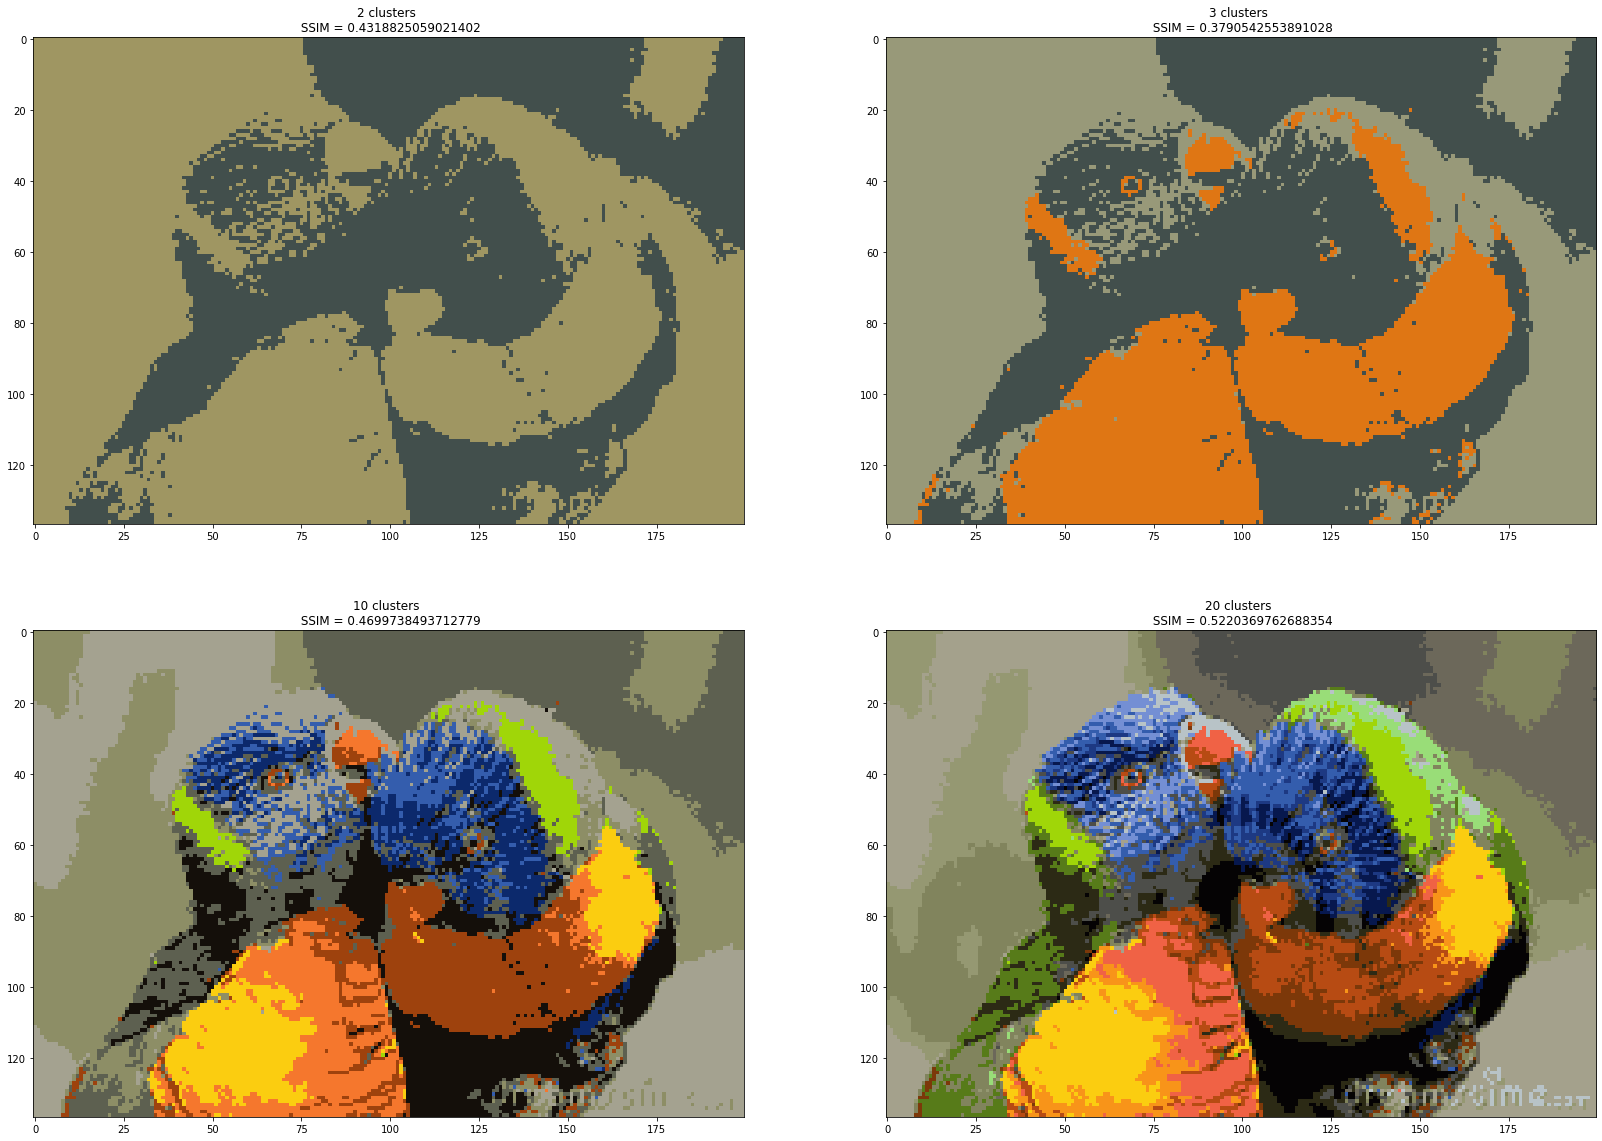

In [ ]:
aggl_ssim = []
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(28, 20))
for k, n in enumerate((2, 3, 10, 20)):
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    new_img = model.fit_predict(my_img)
    dct = {}
    for j, i in enumerate(new_img):
        if i not in dct.keys():
            dct[i] = []
            color = np.array(my_img[j])[::-1]
            dct[i].append(color)
        else:
            color = np.array(my_img[j])[::-1]
            dct[i].append(color)
    for d in dct:
        dct[d] = np.median(np.array(dct[d]), axis=0)
    final_img = np.zeros(my_img.shape)
    for i in range(final_img.shape[0]):
        final_img[i] = dct[new_img[i]]
    final_img = final_img.reshape(res_img.shape).astype(int)
    ssm = ssim(res_img, final_img, multichannel=True)
    ax[k // 2][k % 2].imshow(final_img)
    ax[k // 2][k % 2].set_title(f'{n} clusters \n SSIM = {ssm}')
    aggl_ssim.append(ssm)

In [ ]:
for i, n in enumerate((2, 3, 10, 20)):
    print(f'{n} clusters:')
    print(f'KMeans ssim: {kmean_ssim[i]}')
    print(f'Agglomerative ssim: {aggl_ssim[i]}')
print(f'DBSCAN ssim: {dbscan_ssim}')

2 clusters:
KMeans ssim: 0.5032614297790645
Agglomerative ssim: 0.4318825059021402
3 clusters:
KMeans ssim: 0.48585559825196994
Agglomerative ssim: 0.3790542553891028
10 clusters:
KMeans ssim: 0.5340535831550796
Agglomerative ssim: 0.4699738493712779
20 clusters:
KMeans ssim: 0.5791843816001315
Agglomerative ssim: 0.5220369762688354
DBSCAN ssim: 0.4823585868726495


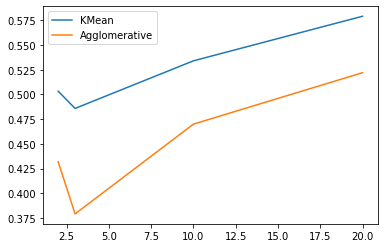

In [ ]:
plt.plot((2, 3, 10, 20), kmean_ssim)
plt.plot((2, 3, 10, 20), aggl_ssim)
plt.legend(('KMean', 'Agglomerative'))

Таким образом, лучше всего себя показал алгоритм KMeans: наиболее плавный переход из одного оттенка в другой, наивысшее значение ssim. На 2м месте находится алгоритм аггломеративной кластеризации: цвета переданы правильно, однако внутри участка одного из цветов присутствуют пиксели другого цвета, из-за чего изображение становится более рваным и менее плавным. Хуже всего себя показал алгоритм DBSCAN: изображение лишь отдаленно напоминает исходное.

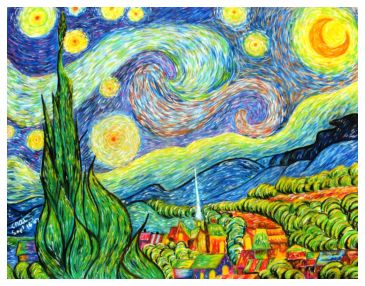

In [ ]:
img1 = cv2.imread('2.jpg') # считать картинку
draw_picture(img1)

C:\Users\mityk\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
C:\Users\mityk\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
C:\Users\mityk\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
C:\Users\mityk\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


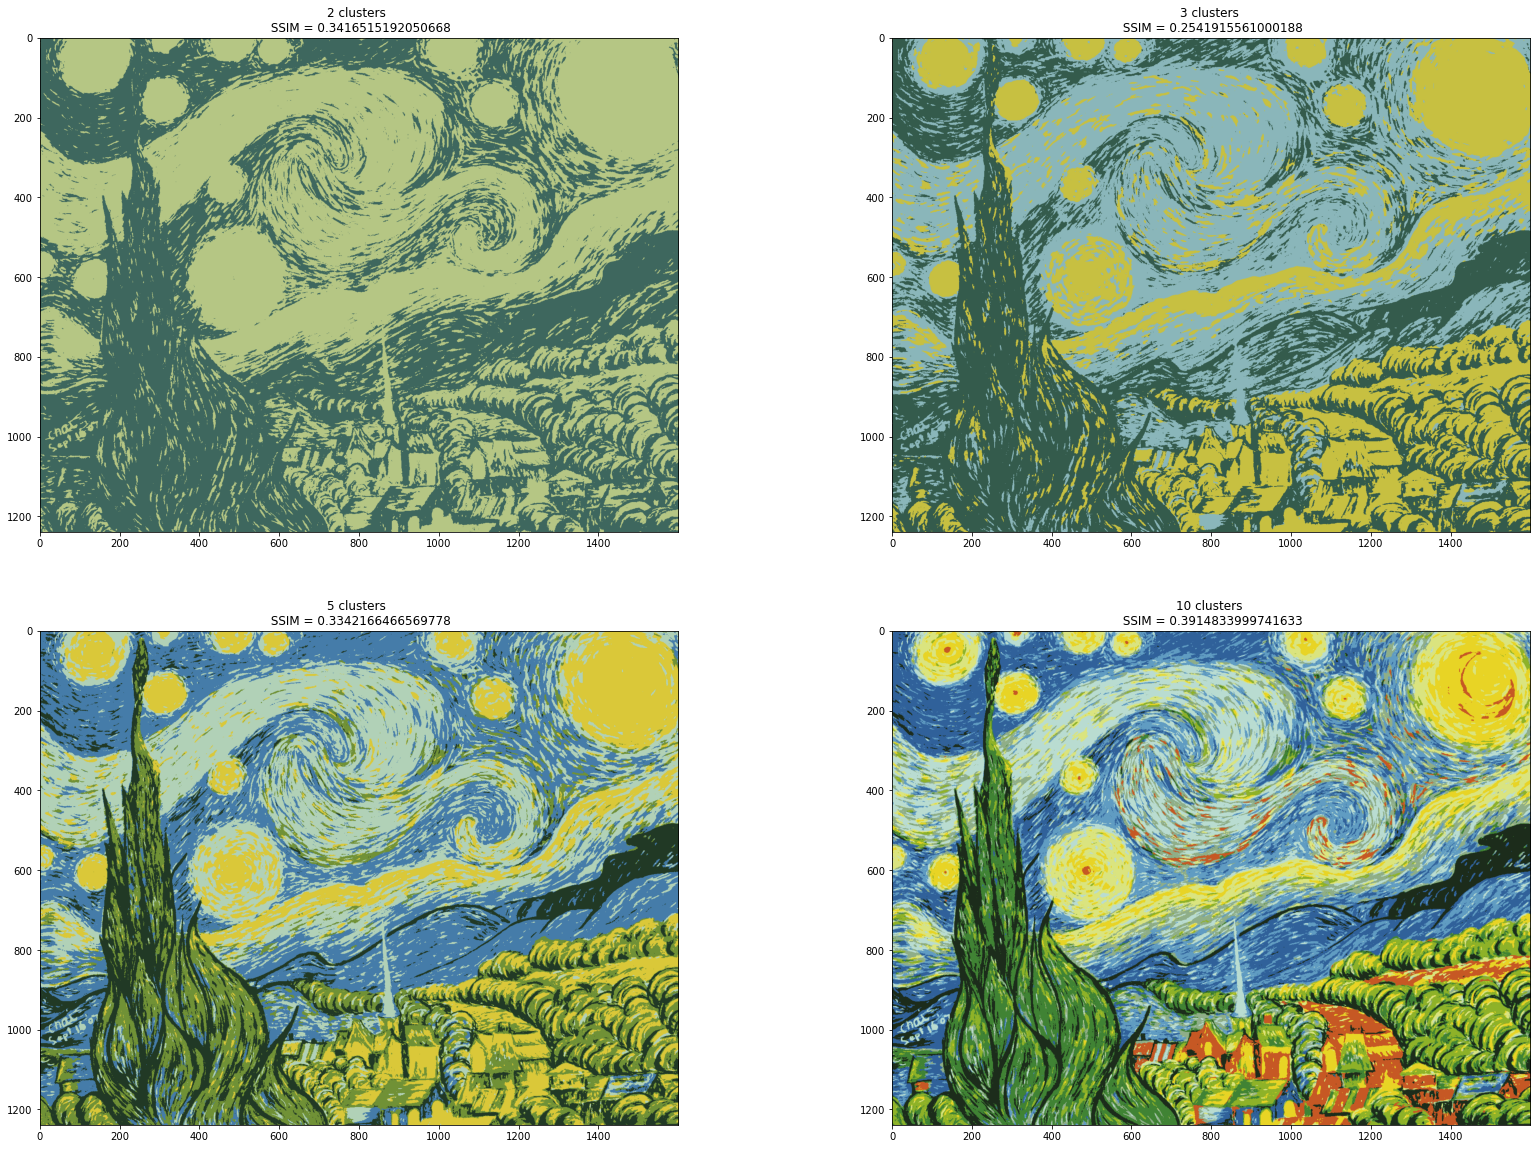

In [ ]:
my_img1 = img1.reshape(img1.shape[0] * img1.shape[1], 3)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(28, 20))
for i, n in enumerate((2, 3, 5, 10)):
    model = KMeans(n_clusters=n)
    new_img1 = model.fit_predict(my_img1)
    final_img1 = np.array(list(map(lambda x: model.cluster_centers_[x].astype(int)[::-1],
                              new_img1))).reshape(img1.shape)

    ssm = ssim(img1, final_img1, multichannel=True)
    ax[i // 2][i % 2].imshow(final_img1)
    ax[i // 2][i % 2].set_title(f'{n} clusters \n SSIM = {ssm}')

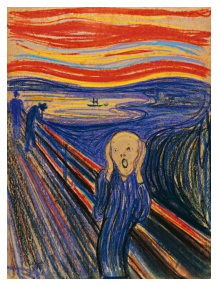

In [ ]:
img2 = cv2.imread('4.jpg') # считать картинку
draw_picture(img2)

C:\Users\mityk\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
C:\Users\mityk\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
C:\Users\mityk\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
C:\Users\mityk\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


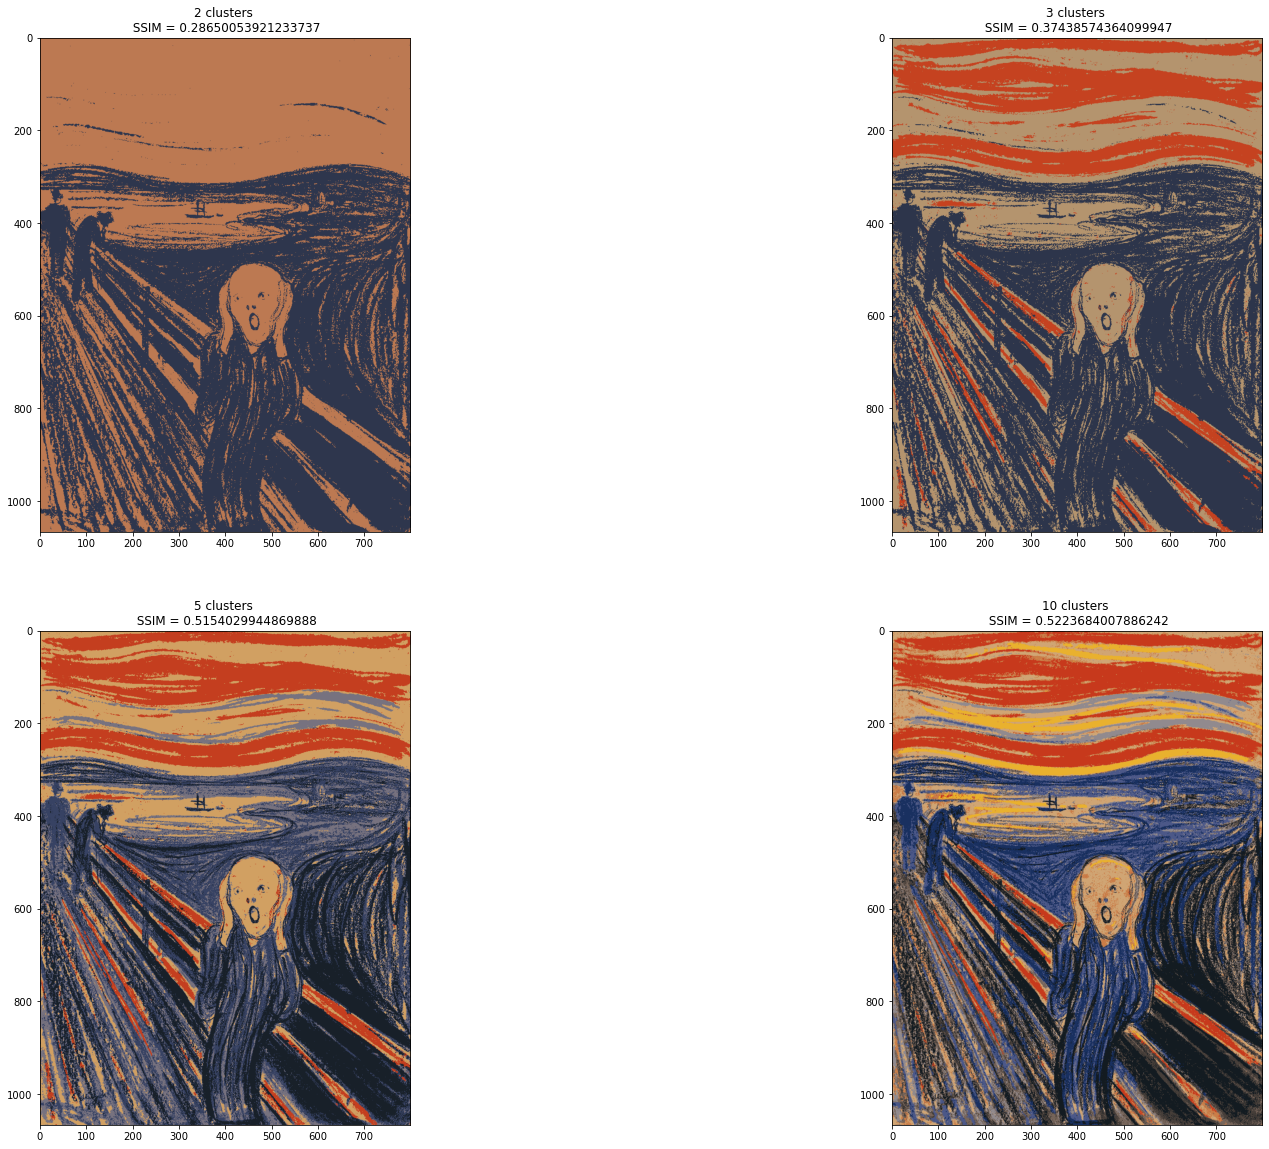

In [ ]:
my_img2 = img2.reshape(img2.shape[0] * img2.shape[1], 3)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(28, 20))
for i, n in enumerate((2, 3, 5, 10)):
    model = KMeans(n_clusters=n)
    new_img2 = model.fit_predict(my_img2)
    final_img2 = np.array(list(map(lambda x: model.cluster_centers_[x].astype(int)[::-1],
                              new_img2))).reshape(img2.shape)

    ssm = ssim(img2, final_img2, multichannel=True)
    ax[i // 2][i % 2].imshow(final_img2)
    ax[i // 2][i % 2].set_title(f'{n} clusters \n SSIM = {ssm}')